In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
data = pd.read_csv(r'LeastSq_COVID19_NL_Cases 2021.csv')
print(data.shape)
print(data.head())

(99, 1)
  Day;New Cases per million ppl
0                       1;9.629
1                       2;9.805
2                       3;9.629
3                      4;11.497
4                       5;8.579


In [67]:
D = data['Day;New Cases per million ppl'].values
datapoint = np.array([l.split(';') for l in D],dtype=np.float32)

In [68]:
X = datapoint[:,0]
Y = datapoint[:,1]

In [69]:
def Least_Squares_Analysis(X,Y):

    # Calculating the mean of X and Y
    mean_x = np.mean(X)
    mean_y = np.mean(Y)
    n = len(X)


    # Calculate the coefficients m and b of the formula: y = mx + b
    numerator = 0
    denominator = 0
    for i in range(n):
        numerator += (X[i] - mean_x) * (Y[i] - mean_y)
        denominator += (X[i] - mean_x) ** 2
    m = numerator / denominator
    b = mean_y - (m * mean_x)


    # Calculating Root Mean Squares Error
    Error = 0
    for i in range(n):
        y_pred = m * X[i] + b
        Error += (Y[i] - y_pred) ** 2
    Error = np.sqrt(Error/n)
    
    
    # Printing the values
    print("Coefficients")
    print("Slope:")
    print(m)
    print("Y Intercept:")
    print(b)
    print("Root Mean Squared Error")
    print(Error)

In [70]:
Least_Squares_Analysis(X,Y)

Coefficients
Slope:
5.363297241343048
Y Intercept:
-111.35188904469146
Root Mean Squared Error
86.21841529774989


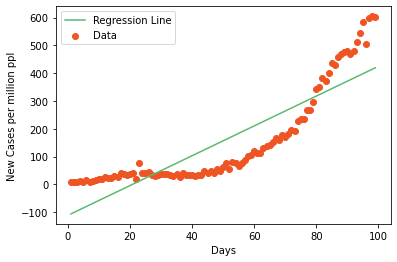

In [71]:
# Plotting Values and Regression Line
max_x = np.max(X)
min_x = np.min(X)
 
x = np.linspace(min_x, max_x, 1000)
y = m * x + b
 
# Ploting Line
plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Data
plt.scatter(X, Y, c='#ef5423', label='Data')
 
plt.xlabel('Days')
plt.ylabel('New Cases per million ppl')
plt.legend()
plt.show()